# Day 3: Crossed Wires
https://adventofcode.com/2019/day/3


In [1]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cable_map = np.array(pd.read_csv('2019_3_input.txt',header=None))

# test case
# cable_map = np.array([['R75','D30','R83','U83','L12','D49','R71','U7','L72'],
#                       ['U62','R66','U55','R34','D71','R55','D58','R83']])

In [2]:
value_opcode = {'R':(0,1),    # dict directions
                'L':(0,-1),
                'U':(1,0),
                'D':(-1,0)}

def function_cable_mapping(instructions):
    pos = (0,0)             # start position
    coord_cable = []        # list of coordinates for cable
    for instruction in instructions:
        opcode = instruction[0]                     # operational code, opcode in [L,R,U,D]
        steps = int(instruction[1:])                # number of steps
        direction = np.array(value_opcode[opcode])  # direction of next step
        
        for s in range(1,steps+1):
            coord_cable.append(pos + np.array(direction)*s)  # store all coordinates of cable
            
        pos = pos + np.array(direction)*steps   # update position
    return np.array(coord_cable)

# list of coordinates for all cables
coord = []                 
for cable in cable_map:  
    coord.append(function_cable_mapping(cable))

# dictionary of coordinates (unique list)    
dict1 = {(x, y) for x, y in coord[0]}
dict2 = {(x, y) for x, y in coord[1]}
intersections = np.array(list(set(dict1) & set(dict2)))  # compare dicts

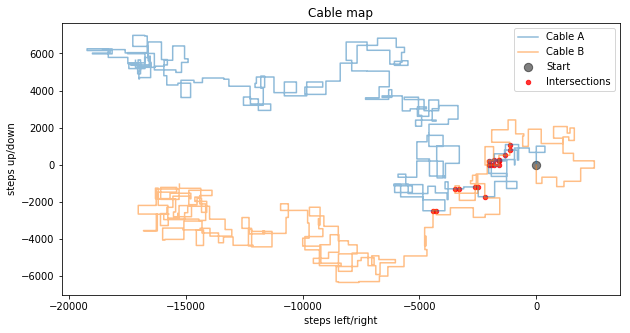

In [3]:
# cable map
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(coord[0][:,0],coord[0][:,1], alpha = 0.5)
ax.plot(coord[1][:,0],coord[1][:,1], alpha = 0.5)
ax.set_title('Cable map')
ax.set_xlabel('steps left/right')
ax.set_ylabel('steps up/down')
ax.scatter(0,0, alpha = 0.5, c='k', s=70)
ax.scatter(intersections[:,0],intersections[:,1], alpha = 0.8, c='r', s=20)


plt.legend(['Cable A', 'Cable B', 'Start','Intersections']);

In [4]:
# Part I - Manhattan distnace
intersection_manhattan = np.abs(intersections).sum(axis=1).min()
print('Closest intersection with Manhattan distance:', intersection_manhattan)

Closest intersection with Manhattan distance: 1626


In [5]:
# Part II - Length cable
def length_intersection(cable, intersections):
    length = []
    for intersect in intersections:
        test = (cable == intersect)  # True if cable[:,0] == intersect[0], and/or cable[:,1] == intersect[1]
        test = test[:,0]*test[:,1]   # [True, True] == [True]
        length.append(np.where(test == True)[0]+1) # index = length to intersection (missing first step, hence add 1)
    return np.array(length)
    
length_cableA = length_intersection(coord[0], intersections)  
length_cableB = length_intersection(coord[1], intersections)  
intersection_length = (length_cableA+length_cableB).min() 

print('Closest intersection with length of cable:', intersection_length)

Closest intersection with length of cable: 27330
